# Data cleaning and Initial Exploration

Here is documentation of the 8 initial datasets, with initial exploration and data cleaning.<br>
New data sets will be created from these data sets and saved as new files with meaningful names!


In [190]:
import numpy as np
import pandas as pd
import glob
import os
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns


# Looking at data before importing

8 datasets were intially supplied for this project, here's a summary of each

---
# Growth Of Lending - Individuals

`GrowthOfLending_Individuals.xlxs`<br>
1 sheet with following info:
* Monthly growth rates (for 1 month, 3 months, 6 months, 12 months) not leading to individuals
* Data taken from Bank of England

---
# UK Public Service Productivity

`UK Public Service Productivity.xlsx`<br>
4 sheets with the following info:
* sheet explaining whats contained in the spreadsheet "Content"
* UK annual productivity, inputs and outputs form 1997 to 2017 "Annual PSP"
* UK quarterly product, inputs and outputs for 2017 to 2018 "Quarterly PSP"
* Revisions for quarterly data from 2011 to 2017 for each income, output and product "Revisions to PSP"

---
# UK GDP Estimates

`UK GDP Estimates - Time Series.xlsx`<br>
1 sheet with alot of data within it

Multiple variables but is a time series data set from 1946 - 2018, with it also split by quarter (but appended row)<br>
Might be hard to use <br>
This data is split into different variables that lead to GDP

---
# Growth of Output

`Growth of Output.xlxs`<br>
3 sheets with the following info:
* countries and their GDP growth rates based on the local currency from 1961 - 2017 (when the information is available)
* Information on each countries income group, notes on main industries, country codes "Metadata - Countries"
* Explanation of what the data is "Metadata - indicators"

---
# Global Competitiveness Dataset

`Global Competitiveness Dataset.xlxs`<br>
4 sheets
* Terms and conditions in "About this dataset"
* Main dataset in "Data"
    * countries are variables, each row is global competitiveness index per country for 2018, and 2017 forecast
    * some hidden columns with meanings in the next sheet
* Meaning for each row in "Meta Data"
* Countries and their codes in "Entities"


---
# Global Financial Development

`Global Financial Development.xlxs`<br>
2 sheets with the following info in them:
* "Definitions and Sources" is a sheet explaining each variable
* "Data - July 2018" is a sheet with alot of info on GDP for different countries
    * Variables of interest will be population total `SP.POP.TOTL`, GDP per capita `NY.GDP.PCAP.KD`

The value of this data set will be to calculate the GDP per capita of countries that don't have it yet


---
# UK Labour Productivity 

`Uk Labour Productivity - Time Series.xlxs`<br>
1 sheet with alot of data within it

Multiple variables but is a time series data set from 1960 - 2018, with it also split by quarter (but appended row)<br>
Might be hard to use (like above)<br>
This data is split into different variables that lead to Productivity


---
# Exports by business size

`Exports by business size - OECD.xlsx` <br>
1 sheet with the following variables:

* Location - countries with the first 3 letters to denote
* Indicator - one factor "EXPBSNS" meaning expenses
* Subject - number of employees (All, 0-9, 10-49, 50-249, 250 or more)
* Measure - one factor "MLN_USD" which is the currency used to measure
* Frequency - one factor "A" meaning whole year/all year
* Time - which year the row relates to (2008 - 2017)
* Value - value of MLN_USD for that year (if next column has E then it's an estimate)


---
---

# Data Cleaning

Here will perform any steps to clean data/create new data sets for initial exploaration into trends of GDP and Productivity

In [127]:
# use glob to get all the csv files in the folder
path = r'/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data'
excel_files = glob.glob(os.path.join(path, "*.xls*"))
# The files are stored in excel_files in the order that they appear above
excel_files

['/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/GrowthOfLending_Individuals.xlsx',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/~$Uk Labour Productivity - Time Series.xlsx',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/UK Public Service Productivity.xlsx',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/UK GDP Estimates - Time Series.xlsx',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/~$UK Public Service Productivity.xlsx',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/Growth Of Output.xls',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/Global Competitiveness Dataset.xlsx',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/Global Financial Development.xlsx',
 '/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/Uk Labour Productivity - Time Series.xlsx',
 '/Users/camer

## Loading in the data

Will have to load in each data set individually - as some have multiple sheets, so will have to specify individual sheets in this case

In [116]:
############################
### Loading in the files ###
############################

# Growth of Lending - Individuals data set needs first row not read (it's the title of the table)
individual_growth_lending_raw = pd.read_excel(excel_files[0], header=1, engine='openpyxl')

# UK Public Service Productivity 
# Two data sets here based on yearly and quarterly data - Annual PSP and Quarterly PSP respectively
uk_public_servive_product_yearly =  pd.read_excel(excel_files[1], engine='openpyxl', sheet_name="Annual PSP", header=[4,5])
uk_public_servive_product_quarterly =  pd.read_excel(excel_files[1], engine='openpyxl', sheet_name="Quarterly PSP", header=[4,5])

# UK GDP Estimates - Time Series.xlsx
# Need to split this into yearly and quarterly
uk_gdp_estimates = pd.read_excel(excel_files[2], header=0, engine='openpyxl').iloc[6:]

# Growth Of Output
# Will have to pivot this as in the wrong format
growth_of_outputs = pd.read_excel(excel_files[3], header=3)

# Global Competitiveness Dataset
global_competitiveness = pd.read_excel(excel_files[4], sheet_name="Data", header=4, engine='openpyxl')

# Global Financial Development
global_finan_dev = pd.read_excel(excel_files[5], sheet_name="Data - July 2018", engine='openpyxl')

# Uk Labour Productivity - Time Series
uk_labour_prod = pd.read_excel(excel_files[6], engine='openpyxl').iloc[6:]

# Exports by business size - OECD
exports_business_size = pd.read_excel(excel_files[7], engine='openpyxl')


/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Cleaning the data

In [98]:
### Global Finacial Development ###
# renaming global finacial development columns for ease of use later on
global_finan_dev.rename(columns={
    "ny_gdp_pcap_kd": "gdp_per_capita",
    "ny_gdp_mktp_cd": "gdp",
    "sp_pop_totl": "population"
}, inplace=True)

# Impute gdp per capita if not there and then filter out any still not there
global_finan_dev["gdp_per_capita"].fillna(global_finan_dev["gdp"]/global_finan_dev["population"], inplace=True)


In [99]:
# Filter countries for only G7 countries
# Create G7 country list
G7_countries_list = { "Canada", "Germany", "France", "Italy", "Japan", "United Kingdom", "United States"}

# Filter global financial development dataset for only G7 countries
G7_countries_dataset = global_finan_dev.loc[global_finan_dev["country"].isin(G7_countries_list)][:]

In [218]:
### UK GDP Estimates - Time Series ### 

# Renaming columns of interest for ease of use later
uk_gdp_estimates.rename(columns={
    "Title": "year",
    "Total gross final expenditure (aligned) - P.3+P.5+P.6 : CVM SA £m": "gov_consumption",
    "Household final consumption expenditure :National concept CVM SA - £m": "house_consumption",
    "Total Gross Fixed Capital Formation CVM SA £m": "investment",
    "Balance of Payments: Trade in Goods & Services: Total Balance: CVM SA £m": "net_exports",
    "Gross Domestic Product at market prices: Current price: Seasonally adjusted £m": "gdp"
}, inplace=True)

# create a net export value from total_imports and total_exports
uk_gdp_estimates["net_export"] = uk_gdp_estimates["total_exports"] - uk_gdp_estimates["total_imports"]

# Have to split this data up, as there is annual and quarterly data within it
uk_gdp_estimates_annual = uk_gdp_estimates[~uk_gdp_estimates["year"].str.contains("Q")][:]
uk_gdp_estimates_quarterly = uk_gdp_estimates[uk_gdp_estimates["year"].str.contains("Q")][:]

uk_gdp_estimates_annual

,year,05 Furnishings; household equipment & routine maintnce of the house CVM NAYear £,04 Housing; water; electricity; gas and other fuels CVM NAYear SA £m,05 Furnishings; household equipment and routine maintenance of the house CP SA £,07 Transport CVM NAYear SA £m,07 Transport CP SA £m,General Government: Final consumption expenditure (P3): CPSA £m,Gross Value Added at basic prices: Implied deflator:SA:2017=100,06 Health CVM NAYear SA £m,Gross value added at basic prices annual deflator growth rate SA %,...,CII: VPI:Manufacturing Total: CVM SA £m,"Gross Domestic Product at market prices, q-on-q4 growth: CP: NSA £m",Gross value added at basic prices:CVM:Index:SA,Total goods :Total CVM NAYear SA £m,"Gross Domestic Product at market prices, q-on-q1 growth: CP: NSA £m",Total goods: Total CP SA £m,Income based: Gross value added at factor cost: CP SA £m,Durable goods :Total CVM NAYear SA £m,Durable goods: Total CP SA £m,net_export
6,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1948,NaN,NaN,NaN,NaN,NaN,1993.0,NaN,NaN,NaN,...,NaN,NaN,17.6,NaN,NaN,NaN,10362.0,NaN,NaN,-216.0
9,1949,NaN,NaN,NaN,NaN,NaN,2225.0,NaN,NaN,NaN,...,NaN,NaN,18.3,NaN,NaN,NaN,11189.0,NaN,NaN,-181.0
10,1950,NaN,NaN,NaN,NaN,NaN,2315.0,NaN,NaN,NaN,...,NaN,NaN,18.9,NaN,NaN,NaN,11651.0,NaN,NaN,-59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2013,49232.0,323591.0,48855.0,147815.0,150590.0,346587.0,94.9622,19134.0,2.4,...,221.0,NaN,92.6,457541.0,NaN,467773.0,1547756.0,96862.0,98083.0,-29036.0
74,2014,51282.0,322414.0,51263.0,153924.0,156337.0,357101.0,96.1333,19408.0,1.2,...,2657.0,NaN,95.7,465187.0,NaN,477362.0,1619911.0,103764.0,105195.0,-29675.0
75,2015,54448.0,326862.0,54439.0,158270.0,157707.0,361028.0,96.3671,20217.0,0.2,...,3101.0,NaN,98.1,482224.0,NaN,485138.0,1665234.0,112256.0,112074.0,-26984.0
76,2016,59877.0,330257.0,59877.0,164073.0,164073.0,367974.0,98.1583,22096.0,1.9,...,-414.0,NaN,100.0,502840.0,NaN,502840.0,1729600.0,124912.0,124912.0,-30887.0


In [148]:
predictors_for_gdp = uk_gdp_estimates_annual[["year", "gov_consumption", "house_consumption", "investment", "net_exports", "gdp"]][:]
predictors_for_gdp

,year,gov_consumption,house_consumption,investment,net_exports,gdp
6,1946,NaN,NaN,NaN,NaN,NaN
7,1947,NaN,NaN,NaN,NaN,NaN
8,1948,362549.0,218538.0,25604.0,684.0,11581.0
9,1949,376509.0,222386.0,29058.0,1753.0,12348.0
10,1950,387877.0,228627.0,31637.0,6624.0,12926.0
...,...,...,...,...,...,...
73,2013,2355338.0,1141311.0,292413.0,-3739.0,1761347.0
74,2014,2429522.0,1165059.0,313472.0,-11678.0,1844295.0
75,2015,2504151.0,1196525.0,324016.0,-17892.0,1895839.0
76,2016,2557372.0,1235247.0,331442.0,-30887.0,1969524.0


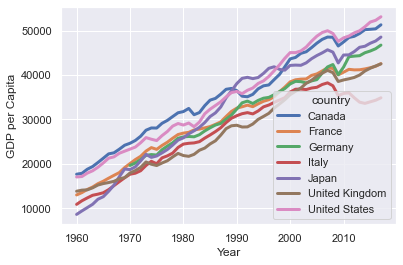

<Figure size 640x480 with 0 Axes>

In [210]:
sns.lineplot(data=G7_countries_dataset, x="year", y="gdp_per_capita", hue='country');
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.figure(figsize=(8, 6), dpi=80);

In [208]:
predictors_for_gdp

,year,gov_consumption,house_consumption,investment,net_exports,gdp
8,1948,362549.0,218538.0,25604.0,684.0,11581.0
9,1949,376509.0,222386.0,29058.0,1753.0,12348.0
10,1950,387877.0,228627.0,31637.0,6624.0,12926.0
11,1951,405543.0,225860.0,33811.0,3757.0,14518.0
12,1952,403790.0,226218.0,37555.0,5702.0,15772.0
...,...,...,...,...,...,...
73,2013,2355338.0,1141311.0,292413.0,-3739.0,1761347.0
74,2014,2429522.0,1165059.0,313472.0,-11678.0,1844295.0
75,2015,2504151.0,1196525.0,324016.0,-17892.0,1895839.0
76,2016,2557372.0,1235247.0,331442.0,-30887.0,1969524.0


In [149]:
predictors_for_gdp.dropna(inplace=True)

In [150]:
from sklearn.linear_model import LinearRegression

In [192]:
# set the response dataset 
response_var = predictors_for_gdp["gdp"][:]

# put our predictors in a data frame
predictor_vars = predictors_for_gdp.drop(columns = "gdp")[:]

In [193]:
model = LinearRegression()

model.fit(predictor_vars, response_var)

LinearRegression()

In [194]:
model.score(predictor_vars, response_var)

0.9892200209219835

In [195]:
model.coef_

array([-3.85392387e+03,  1.24171823e+00,  3.73473576e-01, -3.07808833e+00,
        8.83881836e-01])

In [196]:
import statsmodels.api as sm

# add in the constant to the data
predictor_vars = sm.add_constant(predictor_vars)
predictor_vars.head()

,const,year,gov_consumption,house_consumption,investment,net_exports
8,1.0,1948,362549.0,218538.0,25604.0,684.0
9,1.0,1949,376509.0,222386.0,29058.0,1753.0
10,1.0,1950,387877.0,228627.0,31637.0,6624.0
11,1.0,1951,405543.0,225860.0,33811.0,3757.0
12,1.0,1952,403790.0,226218.0,37555.0,5702.0


In [197]:
sm_model = sm.OLS(response_var.astype(float), predictor_vars.astype(float)).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1175.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.57e-61
Time:                        10:18:03   Log-Likelihood:                -876.39
No. Observations:                  70   AIC:                             1765.
Df Residuals:                      64   BIC:                             1778.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.029e+06   9.77e+0

colinearity - see if the two significant findings 

In [188]:
model = LinearRegression()

predictor_vars = predictor_vars[["gov_consumption","investment"]]

model.fit(predictor_vars, response_var)

LinearRegression()

In [189]:
predictor_vars = sm.add_constant(predictor_vars)
predictor_vars.head()

sm_model = sm.OLS(response_var.astype(float), predictor_vars.astype(float)).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3037.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.85e-66
Time:                        10:15:20   Log-Likelihood:                -876.81
No. Observations:                  70   AIC:                             1760.
Df Residuals:                      67   BIC:                             1766.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.352e+05   1.94e+04    -

Text(0, 0.5, 'Residual')

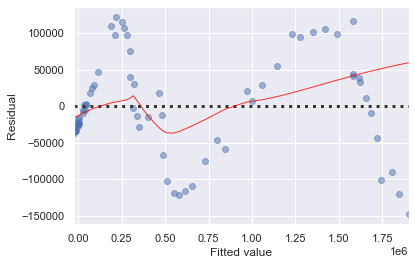

In [198]:
#first calculate the residuals
residuals = sm_model.fittedvalues - response_var

sns.residplot(x = sm_model.fittedvalues, y = residuals, # data to plot
                          lowess = True, # Fit a lowess smoother to the residual scatterplot
                          scatter_kws = {'alpha': 0.5}, # set the transparency of the scatter points
                          line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8}) # set the line colour/transparency
plt.xlabel("Fitted value")
plt.ylabel("Residual")

In [221]:
uk_gdp_estimates_annual.dropna(axis=1, how="all", inplace=True)

In [236]:
uk_gdp_estimates_annual.dropna(inplace=True)

new_df = uk_gdp_estimates_annual.loc[:,~uk_gdp_estimates_annual.columns.str.contains("%")]

In [237]:
full_model = LinearRegression()

full_predictors = new_df.drop(columns="gdp")[:]
full_response = new_df["gdp"][:]

full_model.fit(full_predictors, full_response)

LinearRegression()

In [238]:
full_predictors = sm.add_constant(full_predictors)

sm_model = sm.OLS(full_response.astype(float), full_predictors.astype(float)).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                nan
Time:                        11:38:15   Log-Likelihood:                 316.63
No. Observations:                  20   AIC:                            -593.3
Df Residuals:                       0   BIC:                            -573.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/statsmodels/base/model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
